In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


from pymatgen import Lattice, Structure, Molecule
from pymatgen.io.vasp import outputs as vaspout
from pymatgen.io.vasp import inputs as vaspin
from pymatgen.symmetry import analyzer
from random import shuffle

import pymatgen as pmg
from pymatgen.io.vasp import outputs as vasp
from pymatgen.core.surface import Slab, SlabGenerator
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.transformations import standard_transformations
from scipy.interpolate import interp1d

In [3]:
def PlotPotential(folder):
    slab3=pmg.Structure.from_file(folder+"/CONTCAR")
    locpot3=vasp.Locpot.from_file(folder+"/LOCPOT")
    y=locpot3.get_average_along_axis(2)
    x=locpot3.get_axis_grid(2)

    yy=y
    win=np.ones(len(x)//3)
    filtered=np.convolve(yy, win, mode='same') / sum(win)
    x_len=len(x)
    bulk_min=int(x_len*(0.3-0.05))
    bulk_max=int(x_len*(0.3+0.05))
    vac_min=int(x_len*(0.8-0.05))
    vac_max=int(x_len*(0.8+0.05))
    bulk=np.average(filtered[bulk_min:bulk_max])
    vac=np.average(filtered[vac_min:vac_max])

    fig, ax1 = plt.subplots()
    ax1.plot(x,y-np.amax(y))
    #ax1.plot(x,filtered-np.amax(y))
    #ax1.plot(x[bulk_min:bulk_max],bulk*np.ones(bulk_max-bulk_min)-np.amax(y),"r-",lw=5)
    #ax1.plot(x[vac_min:vac_max],vac*np.ones(vac_max-vac_min)-np.amax(y),"k-",lw=5)
    #ax1.text(x[int((bulk_max+bulk_min)/2)],bulk-2-np.amax(y),'V={:.3f}'.format(bulk),backgroundcolor='w',color='r')
    #ax1.text(x[int((vac_max+vac_min)/2)],vac-2-np.amax(y),'V={:.3f}'.format(vac),backgroundcolor='w',color='k')
    ax1.set_yticklabels(ax1.get_yticks(), fontsize=16) 
    ax1.set_xticklabels(ax1.get_xticks(), fontsize=16) 
    plt.ylabel('Potential (eV)', fontsize=16)
    plt.xlabel(r'Position ($\rm \AA$)', fontsize=16)
    
    #plt.show()
    plt.savefig('potential.png', bbox_inches='tight', format='png', dpi=300)

    return (x, y-np.amax(y))

In [6]:
np.mean(a[1])

-6.714105391571179

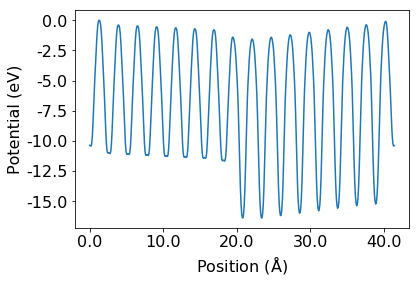

-8.211386911003087 -6.5229426833150725
-5.79018841503395 -6.4502166131301735


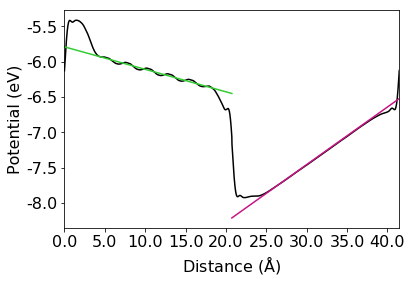

1033 541
-0.0309472729604359


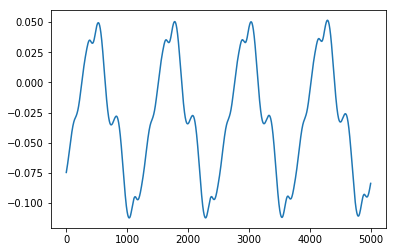

1001 1752
0.08088404760953259


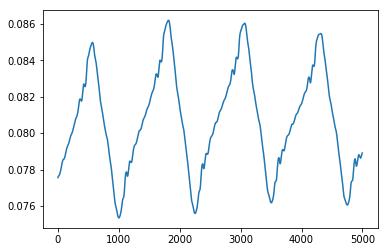

In [4]:
a = PlotPotential("/home/nadamski/SupLatPots/Ga8Sc8/strained/HSE00/")
a = (a[0]+list(np.array(a[0])+a[0][1]*len(a[0])), list(a[1])*2)
plt.show()

fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)

from matplotlib.ticker import FormatStrFormatter

#ScN

N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)

N = 1248
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

L = N2//4
R = 3*N2//4

plt.plot(x +x[L]-x[-1]/2, list(avgl[L:R])+ list(avgl[L:R]), color='black')

xvals =  x[10000:20000]
efield1 = 0.093 / (12.9) / 8.85e-12 / 1e10 * xvals - 9.9
plt.plot(xvals-x[-1]/2 + x[-1]/2, efield1,'mediumvioletred') #ScN
plt.xlim([0, x[-1]/2])

print(efield1[0], efield1[-1])
xvals =  x[20000:30000]
efield2 = -0.093 / (33) / 8.85e-12 / 1e10 * xvals -4.47
plt.plot(xvals-x[-1]/2, efield2,'limegreen') #GaN
print(efield2[0], efield2[-1])


#plt.title('Averaged Electrostatic Potential', fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16) 
ax.set_xticklabels(ax.get_xticks(), fontsize=16) 
plt.ylabel('Potential (eV)', fontsize=16)

plt.xlabel(r'Distance ($\rm \AA$)', fontsize=16)
plt.savefig('/home/nadamski/Potential.png', bbox_inches='tight', format='png', dpi=300)

plt.show()
E = np.diff(avgl[23000:28000]) / np.diff(x[23000:28000])
print(np.argmin(E), np.argmin(E[3000:]))
print(np.mean(E[1037:3547]))
plt.plot(E)

plt.show()
E = np.diff(avgl[13000:18000]) / np.diff(x[13000:18000])
print(np.argmin(E), np.argmin(E[3000:]))
print(np.mean(E[1001:4752]))

plt.plot(E)


plt.show()


In [58]:
0.08088404760953259 * 100e-12 / 1e-10

0.08088404760953258

In [4]:
Etot = 0.08088404760953259 - -0.030903343069966137
sigmab = Etot/2 * (5.637 + 6.575) * 8.85e-12 * 1e10
sigmab

0.0604077819627782

In [7]:
(0.08088404760953259 * (5.637) - -0.030903343069966137 * 6.575) * 8.85e-12 * 1e10

0.0583332578498067

In [11]:
-0.030903343069966137* 8.85e-12 * 1e10

-0.0027349458616920033

In [13]:
0.0210 * 3**0.5 / 0.0072

5.0518148554092255

In [85]:
print(efield2[0]+0.11, efield2[-1]+0.11, efield1[0]-12.73, efield1[-1]-12.73)

-5.68018841503395 -6.340216613130173 -20.941386911003086 -19.252942683315073


In [5]:
print(efield2[0], efield2[-1], efield1[0], efield1[-1])

-5.79018841503395 -6.4502166131301735 -8.211386911003087 -6.5229426833150725


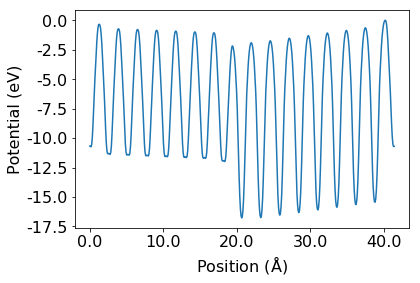

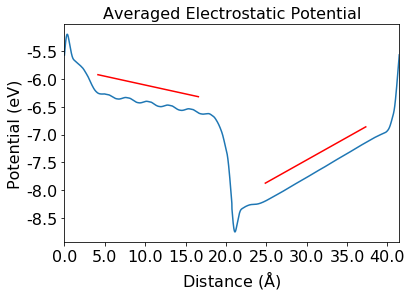

1033 541
-0.026149207235612135


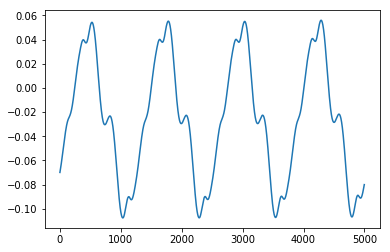

953 438
0.08573301237266714


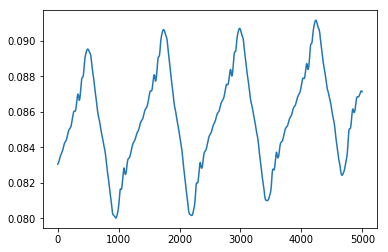

In [64]:
a = PlotPotential("/home/nadamski/SupLatPots/Ga8Sc8/strained/HSE00_chris/")
a = (a[0]+list(np.array(a[0])+a[0][1]*len(a[0])), list(a[1])*2)
plt.show()

fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)

from matplotlib.ticker import FormatStrFormatter

#ScN

N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)

N = 1248
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

L = N2//4
R = 3*N2//4

plt.plot(x +x[L]-x[-1]/2, list(avgl[L:R])+ list(avgl[L:R]))

xvals =  x[12000:18000]
efield1 = 0.093 / (12.9) / 8.85e-12 / 1e10 * xvals - 9.9
plt.plot(xvals-x[-1]/2 + x[-1]/2, efield1,'r') #ScN
plt.xlim([0, x[-1]/2])


xvals =  x[22000:28000]
efield2 = -0.093 / (33) / 8.85e-12 / 1e10 * xvals -4.47
plt.plot(xvals-x[-1]/2, efield2,'r') #GaN

plt.title('Averaged Electrostatic Potential', fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16) 
ax.set_xticklabels(ax.get_xticks(), fontsize=16) 
plt.ylabel('Potential (eV)', fontsize=16)

plt.xlabel(r'Distance ($\rm \AA$)', fontsize=16)
plt.savefig('/home/nadamski/Potential.png', bbox_inches='tight', format='png', dpi=300)

plt.show()
E = np.diff(avgl[23000:28000]) / np.diff(x[23000:28000])
print(np.argmin(E), np.argmin(E[3000:]))
print(np.mean(E[1037:3547]))
plt.plot(E)

plt.show()
E = np.diff(avgl[13000:18000]) / np.diff(x[13000:18000])
print(np.argmin(E), np.argmin(E[3000:]))
print(np.mean(E[1001:4752]))

plt.plot(E)


plt.show()


In [65]:
Etot = 0.08573301237266714 - -0.026149207235612135
sigmab = Etot/2 * (5.637 + 6.575) * 8.85e-12 * 1e10
sigmab

0.06045902571414157

In [69]:
(0.08573301237266714 * (5.637) - -0.026149207235612135 * 6.575) * 8.85e-12 * 1e10

0.05798591050622039

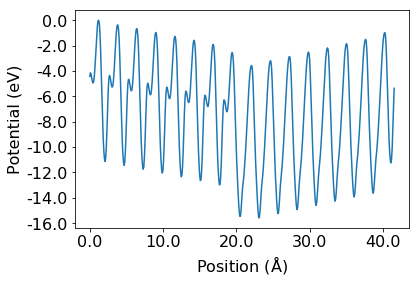

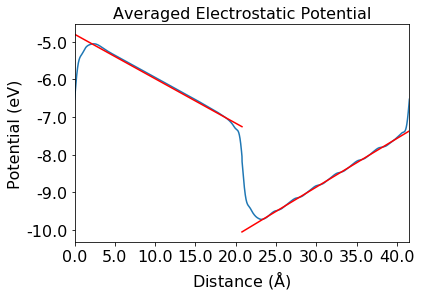

690 1444
-0.11813421912061167


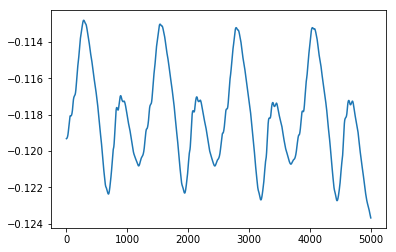

287 1031
0.12905162125236708


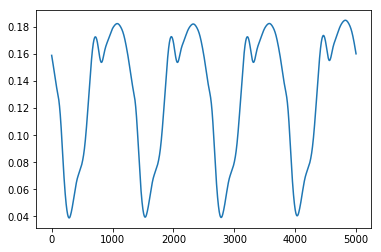

In [77]:
a = PlotPotential("/home/nadamski/SupLatPots/Ga8Sc8/strained/HSE_245/")
a = (a[0]+list(np.array(a[0])+a[0][1]*len(a[0])), list(a[1])*2)
plt.show()

fig = plt.figure(figsize=(6,4)) 
ax = plt.subplot(111)

from matplotlib.ticker import FormatStrFormatter

#ScN

N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)

N = 1254
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

L = N2//4
R = 3*N2//4

plt.plot(x +x[L]-x[-1]/2, list(avgl[L:R])+ list(avgl[L:R]))

xvals =  x[10000:20000]
efield1 = 0.1290575266751764 * xvals
#efield1 = 0.093 / (8.3) / 8.85e-12 / 1e10 * xvals
plt.plot(xvals-x[-1]/2 + x[-1]/2, efield1-12.73,'r') #ScN
plt.xlim([0, x[-1]/2])


xvals =  x[20000:30000]
efield2 = -0.11813421912061167* xvals
#efield2 = -0.093 / (9) / 8.85e-12 / 1e10 * xvals
plt.plot(xvals-x[-1]/2, efield2+0.11,'r') #GaN

plt.title('Averaged Electrostatic Potential', fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16) 
ax.set_xticklabels(ax.get_xticks(), fontsize=16) 
plt.ylabel('Potential (eV)', fontsize=16)

plt.xlabel(r'Distance ($\rm \AA$)', fontsize=16)
plt.savefig('/home/nadamski/Potential.png', bbox_inches='tight', format='png', dpi=300)

plt.show()
E = np.diff(avgl[23000:28000]) / np.diff(x[23000:28000])
print(np.argmin(E[0:1000]), np.argmin(E[3000:4700]))
print(np.mean(E[690:4444]))
plt.plot(E)

plt.show()
E = np.diff(avgl[13000:18000]) / np.diff(x[13000:18000])
print(np.argmin(E), np.argmin(E[3000:]))
print(np.mean(E[276:4021]))
plt.show()
plt.plot(E)



plt.show()


In [9]:
Etot = 0.1290575266751764 - -0.11813421912061167
#Etot = 0.093 / (9) / 8.85e-12 / 1e10 - -0.093 / (8.3) / 8.85e-12 / 1e10
sigmab = Etot/2 * (5.067 + 6.000) * 8.85e-12 * 1e10
#sigmab = Etot/2 * (5.085 + 4) * 8.85e-12 * 1e10

sigmab

0.12105344399444791

In [11]:
(0.1290575266751764 * 5.067 - -0.11813421912061167 * 6.000) * 8.85e-12 * 1e10

0.12060247251123082

In [79]:
print(efield2[0]+0.11, efield2[-1]+0.11, efield1[-1]-12.73, efield1[0]-12.73)

-4.799387100599734 -7.253835181544572 -7.366933466502759 -10.048332649883875


In [7]:
1.34026574 - 1.22795712
1.34026574 - 1.218103930588262
1.315 - 1.1893534343668595

0.12564656563314047

In [12]:
(2 * 0.12564656563314047) / (5.067 + 6)

0.022706526725063788

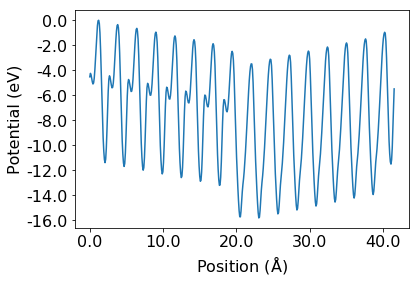

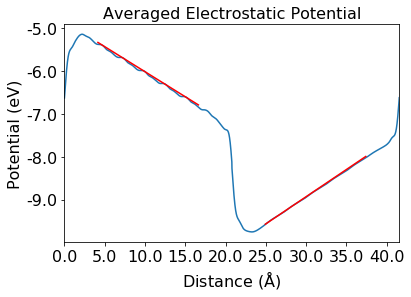

677 1440
-0.11641737889217896


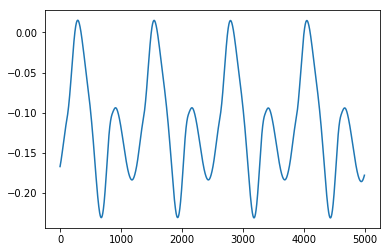

2321 569
0.1241073952171807


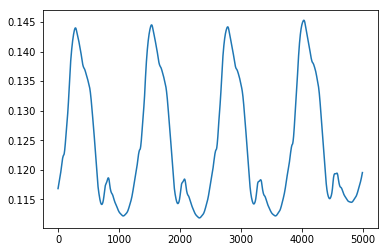

In [52]:
a = PlotPotential("/home/nadamski/SupLatPots/Ga8Sc8/strained/HSE_245_new/")
a = (a[0]+list(np.array(a[0])+a[0][1]*len(a[0])), list(a[1])*2)
plt.show()

fig = plt.figure(figsize=(6,4)) 
ax = plt.subplot(111)

from matplotlib.ticker import FormatStrFormatter

#ScN

N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)

N = 1247
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

L = N2//4
R = 3*N2//4

plt.plot(x +x[L]-x[-1]/2, list(avgl[L:R])+ list(avgl[L:R]))

xvals =  x[12000:18000]
efield1 = 0.093 / (8.3) / 8.85e-12 / 1e10 * xvals
plt.plot(xvals-x[-1]/2 + x[-1]/2, efield1-12.73,'r') #ScN
plt.xlim([0, x[-1]/2])


xvals =  x[22000:28000]
efield2 = -0.093 / (9) / 8.85e-12 / 1e10 * xvals
plt.plot(xvals-x[-1]/2, efield2,'r') #GaN

plt.title('Averaged Electrostatic Potential', fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16) 
ax.set_xticklabels(ax.get_xticks(), fontsize=16) 
plt.ylabel('Potential (eV)', fontsize=16)

plt.xlabel(r'Distance ($\rm \AA$)', fontsize=16)
plt.savefig('/home/nadamski/Potential.png', bbox_inches='tight', format='png', dpi=300)

plt.show()
E = np.diff(avgl[23000:28000]) / np.diff(x[23000:28000])
print(np.argmin(E[0:1000]), np.argmin(E[3000:4700]))
print(np.mean(E[690:4444]))
plt.plot(E)

plt.show()
E = np.diff(avgl[13000:18000]) / np.diff(x[13000:18000])
print(np.argmin(E), np.argmin(E[3000:]))
print(np.mean(E[276:4021]))
plt.show()
plt.plot(E)



plt.show()


In [50]:
Etot = 0.12409911389466986 - -0.11667457615157975
#Etot = 0.093 / (9) / 8.85e-12 / 1e10 - -0.093 / (8.3) / 8.85e-12 / 1e10
sigmab = Etot/2 * (5.067 + 6.000) * 8.85e-12 * 1e10
#sigmab = Etot/2 * (5.085 + 4) * 8.85e-12 * 1e10

sigmab

0.11791042742757663

In [53]:
(0.12409911389466986 * 5.067 - -0.11667457615157975 * 6.000) * 8.85e-12 * 1e10

0.1176039035307187

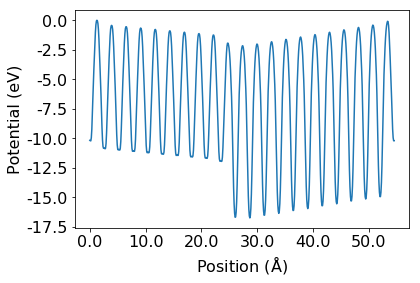

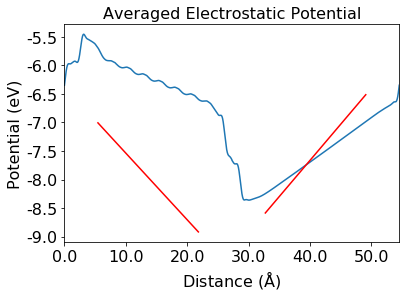

1026 392
-0.04384628268173428


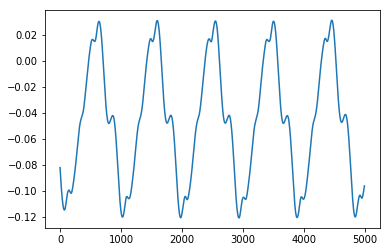

139 489
0.07778579254045563


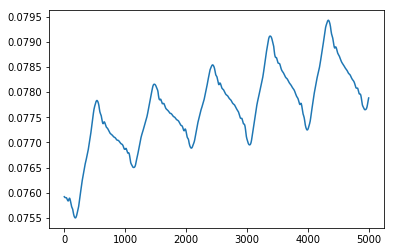

In [43]:
a = PlotPotential("/home/nadamski/SupLatPots/Ga10Sc11/strained/HSE00/")
a = (a[0]+list(np.array(a[0])+a[0][1]*len(a[0])), list(a[1])*2)
plt.show()

fig = plt.figure(figsize=(6,4)) 
ax = plt.subplot(111)

from matplotlib.ticker import FormatStrFormatter

#ScN

N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)

N = 1902
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

L = N2//4
R = 3*N2//4

plt.plot(x +x[L]-x[-1]/2, list(avgl[L:R])+ list(avgl[L:R]))

xvals =  x[12000:18000]
efield1 = 0.093 / (8.3) / 8.85e-12 / 1e10 * xvals
plt.plot(xvals-x[-1]/2 + x[-1]/2, efield1-12.73,'r') #ScN
plt.xlim([0, x[-1]/2])


xvals =  x[22000:28000]
efield2 = -0.093 / (9) / 8.85e-12 / 1e10 * xvals
plt.plot(xvals-x[-1]/2, efield2,'r') #GaN

plt.title('Averaged Electrostatic Potential', fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16) 
ax.set_xticklabels(ax.get_xticks(), fontsize=16) 
plt.ylabel('Potential (eV)', fontsize=16)

plt.xlabel(r'Distance ($\rm \AA$)', fontsize=16)
plt.savefig('/home/nadamski/Potential.png', bbox_inches='tight', format='png', dpi=300)

plt.show()
E = np.diff(avgl[23000:28000]) / np.diff(x[23000:28000])
print(np.argmin(E[0:1200]), np.argmin(E[3500:4700]))
print(np.mean(E[1115:3931]))
plt.plot(E)

plt.show()
E = np.diff(avgl[13000:18000]) / np.diff(x[13000:18000])
print(np.argmin(E[1000:1200]), np.argmin(E[3500:]))
print(np.mean(E[1139:3989]))
plt.show()
plt.plot(E)



plt.show()


SyntaxError: invalid syntax (<ipython-input-38-321306ad5a07>, line 1)

In [39]:
Etot = 0.07778579254045563 - -0.044940806967516816
sigmab = Etot/2 * (5.637 + 6.575) * 8.85e-12 * 1e10
sigmab

0.06631912256871766

In [40]:
( 0.07778579254045563 * (5.637) - -0.044940806967516816 * 6.575) * 8.85e-12 * 1e10

0.06495584217503449

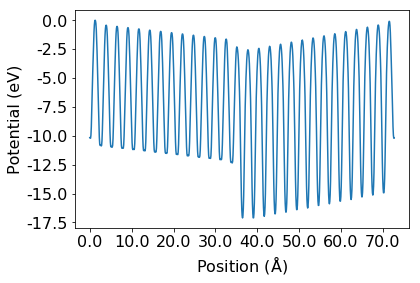

-9.150089155121524 -6.590434301327533
-5.572187275463593 -7.123125803831618


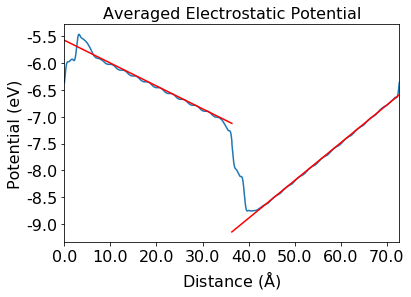

735 817
-0.042638046042261395


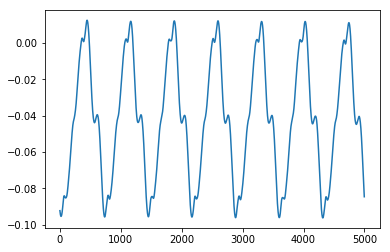

180 532
0.07036944373495402


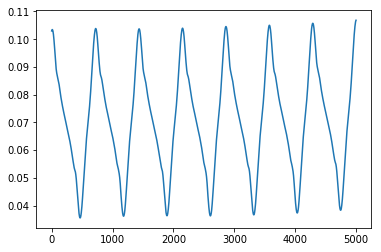

In [93]:
a = PlotPotential("/home/nadamski/SupLatPots/Ga14Sc14/strained/HSE00/")
a = (a[0]+list(np.array(a[0])+a[0][1]*len(a[0])), list(a[1])*2)
plt.show()

fig = plt.figure(figsize=(6,4)) 
ax = plt.subplot(111)

from matplotlib.ticker import FormatStrFormatter

#ScN

N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)

N = 1428
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

L = N2//4
R = 3*N2//4

plt.plot(x +x[L]-x[-1]/2, list(avgl[L:R])+ list(avgl[L:R]))

xvals =  x[10000:20000]
efield1 = 0.07036944373495402 * xvals - 11.71
plt.plot(xvals-x[-1]/2 + x[-1]/2, efield1,'r') #ScN
plt.xlim([0, x[-1]/2])

print(efield1[0], efield1[-1])
xvals =  x[20000:30000]
efield2 = -0.042638046042261395 * xvals -2.47
plt.plot(xvals-x[-1]/2, efield2,'r') #GaN
print(efield2[0], efield2[-1])

plt.title('Averaged Electrostatic Potential', fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16) 
ax.set_xticklabels(ax.get_xticks(), fontsize=16) 
plt.ylabel('Potential (eV)', fontsize=16)

plt.xlabel(r'Distance ($\rm \AA$)', fontsize=16)
plt.savefig('/home/nadamski/Potential.png', bbox_inches='tight', format='png', dpi=300)

plt.show()
E = np.diff(avgl[23000:28000]) / np.diff(x[23000:28000])
print(np.argmin(E[0:1200]), np.argmin(E[3500:4700]))
print(np.mean(E[1115:3931]))
plt.plot(E)

plt.show()
E = np.diff(avgl[13000:18000]) / np.diff(x[13000:18000])
print(np.argmin(E[1000:1200]), np.argmin(E[3500:]))
print(np.mean(E[1139:3989]))
plt.show()
plt.plot(E)



plt.show()


In [47]:
Etot = 0.07036944373495402 - -0.042638046042261395
sigmab = Etot/2 * (5.637 + 6.575) * 8.85e-12 * 1e10
sigmab

0.06106710033330145

In [48]:
( 0.07036944373495402 * (5.637) - -0.042638046042261395 * 6.575) * 8.85e-12 * 1e10

0.059916067074969694

In [62]:
0.01 * 3**0.5

0.017320508075688773

In [63]:
0.07036944373495402 / 3**0.5

0.04062781728309993

In [66]:
-0.11813 / 3**0.5

-0.06820238729937049

In [67]:
-0.0309 / 3**0.5

-0.017840123317959436

In [68]:
0.1290575266751764 / 3**0.5

0.0745113977668604

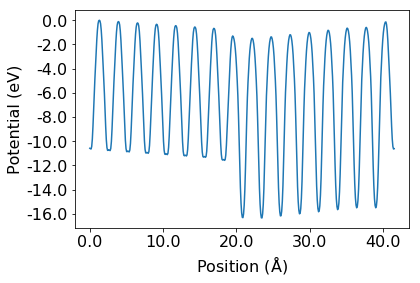

-8.207315761980515 -6.514800792384831
-5.793371313360689 -6.454990801475365


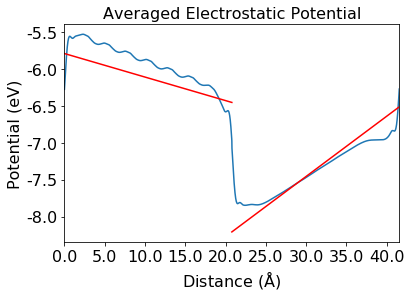

2287 541
-0.04313221232304094


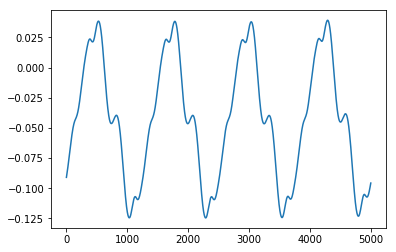

4998 1998
0.06801572304253756


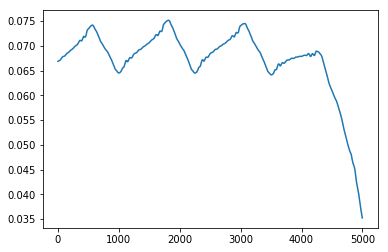

In [4]:
a = PlotPotential("/home/nadamski/SupLatPots/Ga8Sc8/strained/HSE00_ABC/")
a = (a[0]+list(np.array(a[0])+a[0][1]*len(a[0])), list(a[1])*2)
plt.show()

fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)

from matplotlib.ticker import FormatStrFormatter

#ScN

N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)

N = 1248
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

L = N2//4
R = 3*N2//4

plt.plot(x +x[L]-x[-1]/2, list(avgl[L:R])+ list(avgl[L:R]))

xvals =  x[10000:20000]
efield1 = 0.093 / (12.9) / 8.85e-12 / 1e10 * xvals - 9.9
plt.plot(xvals-x[-1]/2 + x[-1]/2, efield1,'r') #ScN
plt.xlim([0, x[-1]/2])

print(efield1[0], efield1[-1])
xvals =  x[20000:30000]
efield2 = -0.093 / (33) / 8.85e-12 / 1e10 * xvals -4.47
plt.plot(xvals-x[-1]/2, efield2,'r') #GaN
print(efield2[0], efield2[-1])


plt.title('Averaged Electrostatic Potential', fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16) 
ax.set_xticklabels(ax.get_xticks(), fontsize=16) 
plt.ylabel('Potential (eV)', fontsize=16)

plt.xlabel(r'Distance ($\rm \AA$)', fontsize=16)
plt.savefig('/home/nadamski/Potential.png', bbox_inches='tight', format='png', dpi=300)

plt.show()
E = np.diff(avgl[23000:28000]) / np.diff(x[23000:28000])
print(np.argmin(E), np.argmin(E[3000:]))
print(np.mean(E[1037:3547]))
plt.plot(E)

plt.show()
E = np.diff(avgl[13000:18000]) / np.diff(x[13000:18000])
print(np.argmin(E), np.argmin(E[3000:]))
print(np.mean(E[1001:4752]))

plt.plot(E)


plt.show()


In [5]:
(0.06801572304253756 * (5.637) - -0.04313221232304094 * 6.575) * 8.85e-12 * 1e10

0.059029405023107884

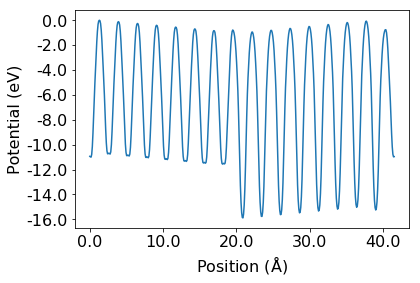

-8.207315761980515 -6.514800792384831
-5.793371313360689 -6.454990801475365


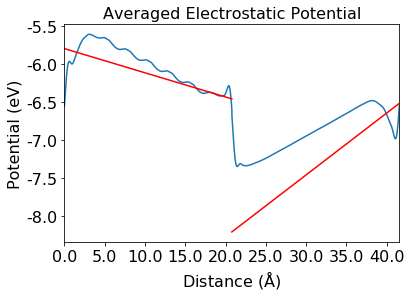

4795 1795
-0.0557555898650731


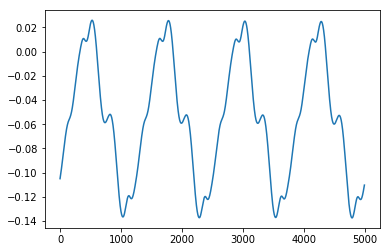

4757 1757
0.059715996923490354


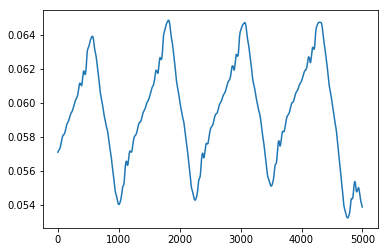

In [7]:
a = PlotPotential("/home/nadamski/SupLatPots/Ga8Sc8/strained/HSE00_BCA/")
a = (a[0]+list(np.array(a[0])+a[0][1]*len(a[0])), list(a[1])*2)
plt.show()

fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)

from matplotlib.ticker import FormatStrFormatter

#ScN

N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)

N = 1248
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

L = N2//4
R = 3*N2//4

plt.plot(x +x[L]-x[-1]/2, list(avgl[L:R])+ list(avgl[L:R]))

xvals =  x[10000:20000]
efield1 = 0.093 / (12.9) / 8.85e-12 / 1e10 * xvals - 9.9
plt.plot(xvals-x[-1]/2 + x[-1]/2, efield1,'r') #ScN
plt.xlim([0, x[-1]/2])

print(efield1[0], efield1[-1])
xvals =  x[20000:30000]
efield2 = -0.093 / (33) / 8.85e-12 / 1e10 * xvals -4.47
plt.plot(xvals-x[-1]/2, efield2,'r') #GaN
print(efield2[0], efield2[-1])


plt.title('Averaged Electrostatic Potential', fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16) 
ax.set_xticklabels(ax.get_xticks(), fontsize=16) 
plt.ylabel('Potential (eV)', fontsize=16)

plt.xlabel(r'Distance ($\rm \AA$)', fontsize=16)
plt.savefig('/home/nadamski/Potential.png', bbox_inches='tight', format='png', dpi=300)

plt.show()
E = np.diff(avgl[23000:28000]) / np.diff(x[23000:28000])
print(np.argmin(E), np.argmin(E[3000:]))
print(np.mean(E[1037:3547]))
plt.plot(E)

plt.show()
E = np.diff(avgl[13000:18000]) / np.diff(x[13000:18000])
print(np.argmin(E), np.argmin(E[3000:]))
print(np.mean(E[1001:4752]))

plt.plot(E)


plt.show()


In [8]:
(0.059715996923490354 * (5.637) - -0.0557555898650731 * 6.575) * 8.85e-12 * 1e10

0.06223426890482052

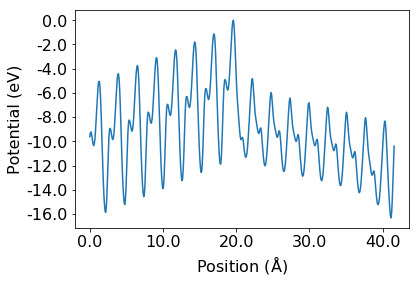

-8.489077268487053 -11.577845629247257
-10.842013583737735 -5.6435402749274175


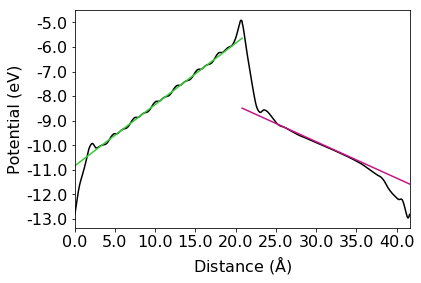

703 3216
0.23922865692003253


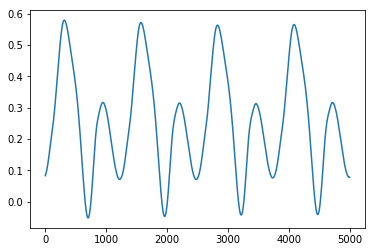

195 3773
-0.14846934609098594


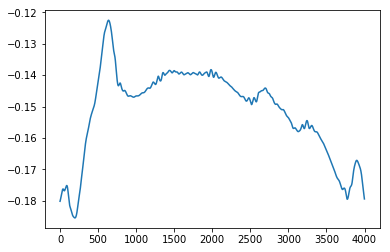

In [47]:
a = PlotPotential("/home/nadamski/SupLatPots/Ga8Sc8/strained/HSE_bulk")
a = (a[0]+list(np.array(a[0])+a[0][1]*len(a[0])), list(a[1])*2)
plt.show()

fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)

from matplotlib.ticker import FormatStrFormatter

#ScN

N2 = 40000

cub = interp1d(a[0], a[1], kind='cubic')
x = np.linspace(a[0][0], a[0][-1], N2)


#1238, 1257
N = 1238
vec = np.concatenate([np.ones(N), np.zeros(N2 - N)], axis=0)
vec

avgl = np.convolve(cub(x), vec/N)

L = N2//4
R = 3*N2//4

plt.plot(x +x[L]-x[-1]/2, list(avgl[L:R])+ list(avgl[L:R]), color='black')

xvals =  x[10000:20000]
efield1 = -0.14846934609098594 * xvals - 5.4
plt.plot(xvals-x[-1]/2 + x[-1]/2, efield1,'mediumvioletred') #ScN
plt.xlim([0, x[-1]/2])

print(efield1[0], efield1[-1])
xvals =  x[20000:30000]
efield2 = 0.24987757017834583 * xvals -21.24
plt.plot(xvals-x[-1]/2, efield2,'limegreen') #GaN
print(efield2[0], efield2[-1])


#plt.title('Averaged Electrostatic Potential', fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16) 
ax.set_xticklabels(ax.get_xticks(), fontsize=16) 
plt.ylabel('Potential (eV)', fontsize=16)

plt.xlabel(r'Distance ($\rm \AA$)', fontsize=16)
plt.savefig('/home/nadamski/Potential.png', bbox_inches='tight', format='png', dpi=300)

plt.show()
E = np.diff(avgl[23000:28000]) / np.diff(x[23000:28000])
print(np.argmin(E[:1000]), 3000 + np.argmin(E[3000:]))
print(np.mean(E[693:4050]))
plt.plot(E)

plt.show()
E = np.diff(avgl[13000:17000]) / np.diff(x[13000:17000])
print(np.argmin(E), 3000 + np.argmin(E[3000:]))
print(np.mean(E[195:3773]))

plt.plot(E)


plt.show()


In [48]:
print(efield2[0], efield2[-1], efield1[0], efield1[-1])

-10.842013583737735 -5.6435402749274175 -8.489077268487053 -11.577845629247257


In [49]:
np.mean(a[1])

-9.130804538230752